In [ ]:
# Data Loading

In [ ]:
!pip install --upgrade Pillow
!pip install -Uqq fastbook

In [15]:

import fastbook
fastbook.setup_book()
from fastbook import *

In [3]:
import os

In [ ]:
!pip install kaggle
# go to kaggle and install your unique api key - move this into the location

In [9]:
if 'apparel-dataset' not in os.listdir():
    if 'apparel-dataset.zip' not in os.listdir():
        print('Dataset has not been downloaded. Downloading now from kaggle')
        !kaggle datasets download -d kaiska/apparel-dataset
    # unzip
    !mkdir apparel-dataset
    !unzip apparel-dataset.zip -d ./apparel-dataset
# move dataset into the correct location
else:
    print("Dataset already loaded")

Dataset does not exist
 95%|██████████████████████████████████████  | 153M/161M [00:09<00:00, 16.5MB/s]
100%|████████████████████████████████████████| 161M/161M [00:09<00:00, 17.1MB/s]
Archive:  apparel-dataset.zip
  inflating: ./apparel-dataset/black_dress/1.jpg  
  inflating: ./apparel-dataset/black_dress/10.jpg  
  inflating: ./apparel-dataset/black_dress/100.jpg  
  inflating: ./apparel-dataset/black_dress/101.jpg  
  inflating: ./apparel-dataset/black_dress/102.jpg  
  inflating: ./apparel-dataset/black_dress/103.jpg  
  inflating: ./apparel-dataset/black_dress/104.jpg  
  inflating: ./apparel-dataset/black_dress/105.jpg  
  inflating: ./apparel-dataset/black_dress/106.jpg  
  inflating: ./apparel-dataset/black_dress/107.jpg  
  inflating: ./apparel-dataset/black_dress/108.jpg  
  inflating: ./apparel-dataset/black_dress/109.jpg  
  inflating: ./apparel-dataset/black_dress/11.jpg  
  inflating: ./apparel-dataset/black_dress/110.jpg  
  inflating: ./apparel-dataset/black_dress/111.

  inflating: ./apparel-dataset/black_pants/121.jpg  
  inflating: ./apparel-dataset/black_pants/122.jpg  
  inflating: ./apparel-dataset/black_pants/123.jpg  
  inflating: ./apparel-dataset/black_pants/124.jpg  
  inflating: ./apparel-dataset/black_pants/125.jpg  
  inflating: ./apparel-dataset/black_pants/126.jpg  
  inflating: ./apparel-dataset/black_pants/127.jpg  
  inflating: ./apparel-dataset/black_pants/128.jpg  
  inflating: ./apparel-dataset/black_pants/129.jpg  
  inflating: ./apparel-dataset/black_pants/13.jpg  
  inflating: ./apparel-dataset/black_pants/130.jpg  
  inflating: ./apparel-dataset/black_pants/131.jpg  
  inflating: ./apparel-dataset/black_pants/132.jpg  
  inflating: ./apparel-dataset/black_pants/133.jpg  
  inflating: ./apparel-dataset/black_pants/134.jpg  
  inflating: ./apparel-dataset/black_pants/135.jpg  
  inflating: ./apparel-dataset/black_pants/136.jpg  
  inflating: ./apparel-dataset/black_pants/137.jpg  
  inflating: ./apparel-dataset/black_pants/138.

  inflating: ./apparel-dataset/black_pants/45.jpg  
  inflating: ./apparel-dataset/black_pants/450.jpg  
  inflating: ./apparel-dataset/black_pants/451.jpg  
  inflating: ./apparel-dataset/black_pants/452.jpg  
  inflating: ./apparel-dataset/black_pants/453.jpg  
  inflating: ./apparel-dataset/black_pants/454.jpg  
  inflating: ./apparel-dataset/black_pants/455.jpg  
  inflating: ./apparel-dataset/black_pants/456.jpg  
  inflating: ./apparel-dataset/black_pants/457.jpg  
  inflating: ./apparel-dataset/black_pants/458.jpg  
  inflating: ./apparel-dataset/black_pants/459.jpg  
  inflating: ./apparel-dataset/black_pants/46.jpg  
  inflating: ./apparel-dataset/black_pants/460.jpg  
  inflating: ./apparel-dataset/black_pants/461.jpg  
  inflating: ./apparel-dataset/black_pants/462.jpg  
  inflating: ./apparel-dataset/black_pants/463.jpg  
  inflating: ./apparel-dataset/black_pants/464.jpg  
  inflating: ./apparel-dataset/black_pants/465.jpg  
  inflating: ./apparel-dataset/black_pants/466.j

  inflating: ./apparel-dataset/black_pants/775.jpg  
  inflating: ./apparel-dataset/black_pants/776.jpg  
  inflating: ./apparel-dataset/black_pants/777.jpg  
  inflating: ./apparel-dataset/black_pants/778.jpg  
  inflating: ./apparel-dataset/black_pants/779.jpg  
  inflating: ./apparel-dataset/black_pants/78.jpg  
  inflating: ./apparel-dataset/black_pants/780.jpg  
  inflating: ./apparel-dataset/black_pants/781.jpg  
  inflating: ./apparel-dataset/black_pants/782.jpg  
  inflating: ./apparel-dataset/black_pants/783.jpg  
  inflating: ./apparel-dataset/black_pants/784.jpg  
  inflating: ./apparel-dataset/black_pants/785.jpg  
  inflating: ./apparel-dataset/black_pants/786.jpg  
  inflating: ./apparel-dataset/black_pants/787.jpg  
  inflating: ./apparel-dataset/black_pants/788.jpg  
  inflating: ./apparel-dataset/black_pants/789.jpg  
  inflating: ./apparel-dataset/black_pants/79.jpg  
  inflating: ./apparel-dataset/black_pants/790.jpg  
  inflating: ./apparel-dataset/black_pants/791.j

  inflating: ./apparel-dataset/black_shirt/328.jpg  
  inflating: ./apparel-dataset/black_shirt/329.jpg  
  inflating: ./apparel-dataset/black_shirt/33.jpg  
  inflating: ./apparel-dataset/black_shirt/330.jpg  
  inflating: ./apparel-dataset/black_shirt/331.jpg  
  inflating: ./apparel-dataset/black_shirt/332.jpg  
  inflating: ./apparel-dataset/black_shirt/333.jpg  
  inflating: ./apparel-dataset/black_shirt/334.jpg  
  inflating: ./apparel-dataset/black_shirt/335.jpg  
  inflating: ./apparel-dataset/black_shirt/336.jpg  
  inflating: ./apparel-dataset/black_shirt/337.jpg  
  inflating: ./apparel-dataset/black_shirt/338.jpg  
  inflating: ./apparel-dataset/black_shirt/339.jpg  
  inflating: ./apparel-dataset/black_shirt/34.jpg  
  inflating: ./apparel-dataset/black_shirt/340.jpg  
  inflating: ./apparel-dataset/black_shirt/341.jpg  
  inflating: ./apparel-dataset/black_shirt/342.jpg  
  inflating: ./apparel-dataset/black_shirt/343.jpg  
  inflating: ./apparel-dataset/black_shirt/344.j

  inflating: ./apparel-dataset/black_shirt/67.jpg  
  inflating: ./apparel-dataset/black_shirt/670.jpg  
  inflating: ./apparel-dataset/black_shirt/671.jpg  
  inflating: ./apparel-dataset/black_shirt/672.jpg  
  inflating: ./apparel-dataset/black_shirt/673.jpg  
  inflating: ./apparel-dataset/black_shirt/674.jpg  
  inflating: ./apparel-dataset/black_shirt/675.jpg  
  inflating: ./apparel-dataset/black_shirt/676.jpg  
  inflating: ./apparel-dataset/black_shirt/677.jpg  
  inflating: ./apparel-dataset/black_shirt/678.jpg  
  inflating: ./apparel-dataset/black_shirt/679.jpg  
  inflating: ./apparel-dataset/black_shirt/68.jpg  
  inflating: ./apparel-dataset/black_shirt/680.jpg  
  inflating: ./apparel-dataset/black_shirt/681.jpg  
  inflating: ./apparel-dataset/black_shirt/682.jpg  
  inflating: ./apparel-dataset/black_shirt/683.jpg  
  inflating: ./apparel-dataset/black_shirt/684.jpg  
  inflating: ./apparel-dataset/black_shirt/685.jpg  
  inflating: ./apparel-dataset/black_shirt/686.j

  inflating: ./apparel-dataset/black_shoes/356.jpg  
  inflating: ./apparel-dataset/black_shoes/357.jpg  
  inflating: ./apparel-dataset/black_shoes/358.jpg  
  inflating: ./apparel-dataset/black_shoes/359.jpg  
  inflating: ./apparel-dataset/black_shoes/36.jpg  
  inflating: ./apparel-dataset/black_shoes/360.jpg  
  inflating: ./apparel-dataset/black_shoes/361.jpg  
  inflating: ./apparel-dataset/black_shoes/362.jpg  
  inflating: ./apparel-dataset/black_shoes/363.jpg  
  inflating: ./apparel-dataset/black_shoes/364.jpg  
  inflating: ./apparel-dataset/black_shoes/365.jpg  
  inflating: ./apparel-dataset/black_shoes/366.jpg  
  inflating: ./apparel-dataset/black_shoes/367.jpg  
  inflating: ./apparel-dataset/black_shoes/368.jpg  
  inflating: ./apparel-dataset/black_shoes/369.jpg  
  inflating: ./apparel-dataset/black_shoes/37.jpg  
  inflating: ./apparel-dataset/black_shoes/370.jpg  
  inflating: ./apparel-dataset/black_shoes/371.jpg  
  inflating: ./apparel-dataset/black_shoes/372.j

  inflating: ./apparel-dataset/black_shoes/650.jpg  
  inflating: ./apparel-dataset/black_shoes/651.jpg  
  inflating: ./apparel-dataset/black_shoes/652.jpg  
  inflating: ./apparel-dataset/black_shoes/653.jpg  
  inflating: ./apparel-dataset/black_shoes/654.jpg  
  inflating: ./apparel-dataset/black_shoes/655.jpg  
  inflating: ./apparel-dataset/black_shoes/656.jpg  
  inflating: ./apparel-dataset/black_shoes/657.jpg  
  inflating: ./apparel-dataset/black_shoes/658.jpg  
  inflating: ./apparel-dataset/black_shoes/659.jpg  
  inflating: ./apparel-dataset/black_shoes/66.jpg  
  inflating: ./apparel-dataset/black_shoes/660.jpg  
  inflating: ./apparel-dataset/black_shoes/661.jpg  
  inflating: ./apparel-dataset/black_shoes/662.jpg  
  inflating: ./apparel-dataset/black_shoes/663.jpg  
  inflating: ./apparel-dataset/black_shoes/664.jpg  
  inflating: ./apparel-dataset/black_shoes/665.jpg  
  inflating: ./apparel-dataset/black_shoes/666.jpg  
  inflating: ./apparel-dataset/black_shoes/667.

  inflating: ./apparel-dataset/black_shorts/271.jpg  
  inflating: ./apparel-dataset/black_shorts/272.jpg  
  inflating: ./apparel-dataset/black_shorts/273.jpg  
  inflating: ./apparel-dataset/black_shorts/274.jpg  
  inflating: ./apparel-dataset/black_shorts/275.jpg  
  inflating: ./apparel-dataset/black_shorts/276.jpg  
  inflating: ./apparel-dataset/black_shorts/277.jpg  
  inflating: ./apparel-dataset/black_shorts/278.jpg  
  inflating: ./apparel-dataset/black_shorts/279.jpg  
  inflating: ./apparel-dataset/black_shorts/28.jpg  
  inflating: ./apparel-dataset/black_shorts/280.jpg  
  inflating: ./apparel-dataset/black_shorts/281.jpg  
  inflating: ./apparel-dataset/black_shorts/282.jpg  
  inflating: ./apparel-dataset/black_shorts/283.jpg  
  inflating: ./apparel-dataset/black_shorts/284.jpg  
  inflating: ./apparel-dataset/black_shorts/285.jpg  
  inflating: ./apparel-dataset/black_shorts/286.jpg  
  inflating: ./apparel-dataset/black_shorts/287.jpg  
  inflating: ./apparel-datase

  inflating: ./apparel-dataset/black_suit/000352.jpg  
  inflating: ./apparel-dataset/black_suit/000353.jpg  
  inflating: ./apparel-dataset/black_suit/000354.jpg  
  inflating: ./apparel-dataset/black_suit/000355.jpg  
  inflating: ./apparel-dataset/black_suit/000357.jpg  
  inflating: ./apparel-dataset/black_suit/000359.jpg  
  inflating: ./apparel-dataset/black_suit/000360.jpg  
  inflating: ./apparel-dataset/black_suit/000361.jpg  
  inflating: ./apparel-dataset/black_suit/000362.jpg  
  inflating: ./apparel-dataset/black_suit/000363.jpg  
  inflating: ./apparel-dataset/black_suit/000366.jpg  
  inflating: ./apparel-dataset/black_suit/000367.jpg  
  inflating: ./apparel-dataset/black_suit/000369.jpg  
  inflating: ./apparel-dataset/black_suit/000370.jpg  
  inflating: ./apparel-dataset/black_suit/000371.jpg  
  inflating: ./apparel-dataset/black_suit/000373.jpg  
  inflating: ./apparel-dataset/black_suit/000374.jpg  
  inflating: ./apparel-dataset/black_suit/000376.jpg  
  inflatin

  inflating: ./apparel-dataset/blue_dress/37.jpg  
  inflating: ./apparel-dataset/blue_dress/370.jpg  
  inflating: ./apparel-dataset/blue_dress/371.jpg  
  inflating: ./apparel-dataset/blue_dress/372.jpg  
  inflating: ./apparel-dataset/blue_dress/373.jpg  
  inflating: ./apparel-dataset/blue_dress/374.jpg  
  inflating: ./apparel-dataset/blue_dress/375.jpg  
  inflating: ./apparel-dataset/blue_dress/376.jpg  
  inflating: ./apparel-dataset/blue_dress/377.jpg  
  inflating: ./apparel-dataset/blue_dress/378.jpg  
  inflating: ./apparel-dataset/blue_dress/379.jpg  
  inflating: ./apparel-dataset/blue_dress/38.jpg  
  inflating: ./apparel-dataset/blue_dress/380.jpg  
  inflating: ./apparel-dataset/blue_dress/381.jpg  
  inflating: ./apparel-dataset/blue_dress/382.jpg  
  inflating: ./apparel-dataset/blue_dress/383.jpg  
  inflating: ./apparel-dataset/blue_dress/384.jpg  
  inflating: ./apparel-dataset/blue_dress/385.jpg  
  inflating: ./apparel-dataset/blue_dress/386.jpg  
  inflating: .

  inflating: ./apparel-dataset/blue_pants/224.jpg  
  inflating: ./apparel-dataset/blue_pants/225.jpg  
  inflating: ./apparel-dataset/blue_pants/226.jpg  
  inflating: ./apparel-dataset/blue_pants/227.jpg  
  inflating: ./apparel-dataset/blue_pants/228.jpg  
  inflating: ./apparel-dataset/blue_pants/229.jpg  
  inflating: ./apparel-dataset/blue_pants/23.jpg  
  inflating: ./apparel-dataset/blue_pants/230.jpg  
  inflating: ./apparel-dataset/blue_pants/231.jpg  
  inflating: ./apparel-dataset/blue_pants/232.jpg  
  inflating: ./apparel-dataset/blue_pants/233.jpg  
  inflating: ./apparel-dataset/blue_pants/234.jpg  
  inflating: ./apparel-dataset/blue_pants/235.jpg  
  inflating: ./apparel-dataset/blue_pants/236.jpg  
  inflating: ./apparel-dataset/blue_pants/237.jpg  
  inflating: ./apparel-dataset/blue_pants/238.jpg  
  inflating: ./apparel-dataset/blue_pants/239.jpg  
  inflating: ./apparel-dataset/blue_pants/24.jpg  
  inflating: ./apparel-dataset/blue_pants/240.jpg  
  inflating: .

  inflating: ./apparel-dataset/blue_pants/547.jpg  
  inflating: ./apparel-dataset/blue_pants/548.jpg  
  inflating: ./apparel-dataset/blue_pants/549.jpg  
  inflating: ./apparel-dataset/blue_pants/55.jpg  
  inflating: ./apparel-dataset/blue_pants/550.jpg  
  inflating: ./apparel-dataset/blue_pants/551.jpg  
  inflating: ./apparel-dataset/blue_pants/552.jpg  
  inflating: ./apparel-dataset/blue_pants/553.jpg  
  inflating: ./apparel-dataset/blue_pants/554.jpg  
  inflating: ./apparel-dataset/blue_pants/555.jpg  
  inflating: ./apparel-dataset/blue_pants/556.jpg  
  inflating: ./apparel-dataset/blue_pants/557.jpg  
  inflating: ./apparel-dataset/blue_pants/558.jpg  
  inflating: ./apparel-dataset/blue_pants/559.jpg  
  inflating: ./apparel-dataset/blue_pants/56.jpg  
  inflating: ./apparel-dataset/blue_pants/560.jpg  
  inflating: ./apparel-dataset/blue_pants/561.jpg  
  inflating: ./apparel-dataset/blue_pants/562.jpg  
  inflating: ./apparel-dataset/blue_pants/563.jpg  
  inflating: .

  inflating: ./apparel-dataset/blue_shirt/153.jpg  
  inflating: ./apparel-dataset/blue_shirt/154.jpg  
  inflating: ./apparel-dataset/blue_shirt/155.jpg  
  inflating: ./apparel-dataset/blue_shirt/156.jpg  
  inflating: ./apparel-dataset/blue_shirt/157.jpg  
  inflating: ./apparel-dataset/blue_shirt/158.jpg  
  inflating: ./apparel-dataset/blue_shirt/159.jpg  
  inflating: ./apparel-dataset/blue_shirt/16.jpg  
  inflating: ./apparel-dataset/blue_shirt/160.jpg  
  inflating: ./apparel-dataset/blue_shirt/161.jpg  
  inflating: ./apparel-dataset/blue_shirt/162.jpg  
  inflating: ./apparel-dataset/blue_shirt/163.jpg  
  inflating: ./apparel-dataset/blue_shirt/164.jpg  
  inflating: ./apparel-dataset/blue_shirt/165.jpg  
  inflating: ./apparel-dataset/blue_shirt/166.jpg  
  inflating: ./apparel-dataset/blue_shirt/167.jpg  
  inflating: ./apparel-dataset/blue_shirt/168.jpg  
  inflating: ./apparel-dataset/blue_shirt/169.jpg  
  inflating: ./apparel-dataset/blue_shirt/17.jpg  
  inflating: .

  inflating: ./apparel-dataset/blue_shirt/47.jpg  
  inflating: ./apparel-dataset/blue_shirt/470.jpg  
  inflating: ./apparel-dataset/blue_shirt/471.jpg  
  inflating: ./apparel-dataset/blue_shirt/472.jpg  
  inflating: ./apparel-dataset/blue_shirt/473.jpg  
  inflating: ./apparel-dataset/blue_shirt/474.jpg  
  inflating: ./apparel-dataset/blue_shirt/475.jpg  
  inflating: ./apparel-dataset/blue_shirt/476.jpg  
  inflating: ./apparel-dataset/blue_shirt/477.jpg  
  inflating: ./apparel-dataset/blue_shirt/478.jpg  
  inflating: ./apparel-dataset/blue_shirt/479.jpg  
  inflating: ./apparel-dataset/blue_shirt/48.jpg  
  inflating: ./apparel-dataset/blue_shirt/480.jpg  
  inflating: ./apparel-dataset/blue_shirt/481.jpg  
  inflating: ./apparel-dataset/blue_shirt/482.jpg  
  inflating: ./apparel-dataset/blue_shirt/483.jpg  
  inflating: ./apparel-dataset/blue_shirt/484.jpg  
  inflating: ./apparel-dataset/blue_shirt/485.jpg  
  inflating: ./apparel-dataset/blue_shirt/486.jpg  
  inflating: .

  inflating: ./apparel-dataset/blue_shoes/12.jpg  
  inflating: ./apparel-dataset/blue_shoes/120.jpg  
  inflating: ./apparel-dataset/blue_shoes/121.jpg  
  inflating: ./apparel-dataset/blue_shoes/122.jpg  
  inflating: ./apparel-dataset/blue_shoes/123.jpg  
  inflating: ./apparel-dataset/blue_shoes/124.jpg  
  inflating: ./apparel-dataset/blue_shoes/125.jpg  
  inflating: ./apparel-dataset/blue_shoes/126.jpg  
  inflating: ./apparel-dataset/blue_shoes/127.jpg  
  inflating: ./apparel-dataset/blue_shoes/128.jpg  
  inflating: ./apparel-dataset/blue_shoes/129.jpg  
  inflating: ./apparel-dataset/blue_shoes/13.jpg  
  inflating: ./apparel-dataset/blue_shoes/130.jpg  
  inflating: ./apparel-dataset/blue_shoes/131.jpg  
  inflating: ./apparel-dataset/blue_shoes/132.jpg  
  inflating: ./apparel-dataset/blue_shoes/133.jpg  
  inflating: ./apparel-dataset/blue_shoes/134.jpg  
  inflating: ./apparel-dataset/blue_shoes/135.jpg  
  inflating: ./apparel-dataset/blue_shoes/136.jpg  
  inflating: .

  inflating: ./apparel-dataset/blue_shoes/402.jpg  
  inflating: ./apparel-dataset/blue_shoes/403.jpg  
  inflating: ./apparel-dataset/blue_shoes/404.jpg  
  inflating: ./apparel-dataset/blue_shoes/405.jpg  
  inflating: ./apparel-dataset/blue_shoes/406.jpg  
  inflating: ./apparel-dataset/blue_shoes/407.jpg  
  inflating: ./apparel-dataset/blue_shoes/408.jpg  
  inflating: ./apparel-dataset/blue_shoes/409.jpg  
  inflating: ./apparel-dataset/blue_shoes/41.jpg  
  inflating: ./apparel-dataset/blue_shoes/410.jpg  
  inflating: ./apparel-dataset/blue_shoes/411.jpg  
  inflating: ./apparel-dataset/blue_shoes/412.jpg  
  inflating: ./apparel-dataset/blue_shoes/413.jpg  
  inflating: ./apparel-dataset/blue_shoes/414.jpg  
  inflating: ./apparel-dataset/blue_shoes/415.jpg  
  inflating: ./apparel-dataset/blue_shoes/416.jpg  
  inflating: ./apparel-dataset/blue_shoes/417.jpg  
  inflating: ./apparel-dataset/blue_shoes/418.jpg  
  inflating: ./apparel-dataset/blue_shoes/419.jpg  
  inflating: 

  inflating: ./apparel-dataset/blue_shorts/208.jpg  
  inflating: ./apparel-dataset/blue_shorts/209.jpg  
  inflating: ./apparel-dataset/blue_shorts/21.jpg  
  inflating: ./apparel-dataset/blue_shorts/210.jpg  
  inflating: ./apparel-dataset/blue_shorts/211.jpg  
  inflating: ./apparel-dataset/blue_shorts/212.jpg  
  inflating: ./apparel-dataset/blue_shorts/213.jpg  
  inflating: ./apparel-dataset/blue_shorts/214.jpg  
  inflating: ./apparel-dataset/blue_shorts/215.jpg  
  inflating: ./apparel-dataset/blue_shorts/216.jpg  
  inflating: ./apparel-dataset/blue_shorts/217.jpg  
  inflating: ./apparel-dataset/blue_shorts/218.jpg  
  inflating: ./apparel-dataset/blue_shorts/219.jpg  
  inflating: ./apparel-dataset/blue_shorts/22.jpg  
  inflating: ./apparel-dataset/blue_shorts/220.jpg  
  inflating: ./apparel-dataset/blue_shorts/221.jpg  
  inflating: ./apparel-dataset/blue_shorts/222.jpg  
  inflating: ./apparel-dataset/blue_shorts/223.jpg  
  inflating: ./apparel-dataset/blue_shorts/224.j

  inflating: ./apparel-dataset/brown_pants/113.jpg  
  inflating: ./apparel-dataset/brown_pants/114.jpg  
  inflating: ./apparel-dataset/brown_pants/115.jpg  
  inflating: ./apparel-dataset/brown_pants/116.jpg  
  inflating: ./apparel-dataset/brown_pants/117.jpg  
  inflating: ./apparel-dataset/brown_pants/118.jpg  
  inflating: ./apparel-dataset/brown_pants/119.jpg  
  inflating: ./apparel-dataset/brown_pants/12.jpg  
  inflating: ./apparel-dataset/brown_pants/120.jpg  
  inflating: ./apparel-dataset/brown_pants/121.jpg  
  inflating: ./apparel-dataset/brown_pants/122.jpg  
  inflating: ./apparel-dataset/brown_pants/123.jpg  
  inflating: ./apparel-dataset/brown_pants/124.jpg  
  inflating: ./apparel-dataset/brown_pants/125.jpg  
  inflating: ./apparel-dataset/brown_pants/126.jpg  
  inflating: ./apparel-dataset/brown_pants/127.jpg  
  inflating: ./apparel-dataset/brown_pants/128.jpg  
  inflating: ./apparel-dataset/brown_pants/129.jpg  
  inflating: ./apparel-dataset/brown_pants/13.j

  inflating: ./apparel-dataset/brown_shoes/164.jpg  
  inflating: ./apparel-dataset/brown_shoes/165.jpg  
  inflating: ./apparel-dataset/brown_shoes/166.jpg  
  inflating: ./apparel-dataset/brown_shoes/167.jpg  
  inflating: ./apparel-dataset/brown_shoes/168.jpg  
  inflating: ./apparel-dataset/brown_shoes/169.jpg  
  inflating: ./apparel-dataset/brown_shoes/17.jpg  
  inflating: ./apparel-dataset/brown_shoes/170.jpg  
  inflating: ./apparel-dataset/brown_shoes/171.jpg  
  inflating: ./apparel-dataset/brown_shoes/172.jpg  
  inflating: ./apparel-dataset/brown_shoes/173.jpg  
  inflating: ./apparel-dataset/brown_shoes/174.jpg  
  inflating: ./apparel-dataset/brown_shoes/175.jpg  
  inflating: ./apparel-dataset/brown_shoes/176.jpg  
  inflating: ./apparel-dataset/brown_shoes/177.jpg  
  inflating: ./apparel-dataset/brown_shoes/178.jpg  
  inflating: ./apparel-dataset/brown_shoes/179.jpg  
  inflating: ./apparel-dataset/brown_shoes/18.jpg  
  inflating: ./apparel-dataset/brown_shoes/180.j

  inflating: ./apparel-dataset/brown_shoes/458.jpg  
  inflating: ./apparel-dataset/brown_shoes/459.jpg  
  inflating: ./apparel-dataset/brown_shoes/46.jpg  
  inflating: ./apparel-dataset/brown_shoes/460.jpg  
  inflating: ./apparel-dataset/brown_shoes/461.jpg  
  inflating: ./apparel-dataset/brown_shoes/462.jpg  
  inflating: ./apparel-dataset/brown_shoes/463.jpg  
  inflating: ./apparel-dataset/brown_shoes/464.jpg  
  inflating: ./apparel-dataset/brown_shoes/47.jpg  
  inflating: ./apparel-dataset/brown_shoes/48.jpg  
  inflating: ./apparel-dataset/brown_shoes/49.jpg  
  inflating: ./apparel-dataset/brown_shoes/5.jpg  
  inflating: ./apparel-dataset/brown_shoes/50.jpg  
  inflating: ./apparel-dataset/brown_shoes/51.jpg  
  inflating: ./apparel-dataset/brown_shoes/52.jpg  
  inflating: ./apparel-dataset/brown_shoes/53.jpg  
  inflating: ./apparel-dataset/brown_shoes/54.jpg  
  inflating: ./apparel-dataset/brown_shoes/55.jpg  
  inflating: ./apparel-dataset/brown_shoes/56.jpg  
  infl

  inflating: ./apparel-dataset/green_shirt/158.jpg  
  inflating: ./apparel-dataset/green_shirt/159.jpg  
  inflating: ./apparel-dataset/green_shirt/16.jpg  
  inflating: ./apparel-dataset/green_shirt/160.jpg  
  inflating: ./apparel-dataset/green_shirt/161.jpg  
  inflating: ./apparel-dataset/green_shirt/162.jpg  
  inflating: ./apparel-dataset/green_shirt/163.jpg  
  inflating: ./apparel-dataset/green_shirt/164.jpg  
  inflating: ./apparel-dataset/green_shirt/165.jpg  
  inflating: ./apparel-dataset/green_shirt/166.jpg  
  inflating: ./apparel-dataset/green_shirt/167.jpg  
  inflating: ./apparel-dataset/green_shirt/168.jpg  
  inflating: ./apparel-dataset/green_shirt/169.jpg  
  inflating: ./apparel-dataset/green_shirt/17.jpg  
  inflating: ./apparel-dataset/green_shirt/170.jpg  
  inflating: ./apparel-dataset/green_shirt/171.jpg  
  inflating: ./apparel-dataset/green_shirt/172.jpg  
  inflating: ./apparel-dataset/green_shirt/173.jpg  
  inflating: ./apparel-dataset/green_shirt/174.j

  inflating: ./apparel-dataset/green_shoes/266.jpg  
  inflating: ./apparel-dataset/green_shoes/267.jpg  
  inflating: ./apparel-dataset/green_shoes/268.jpg  
  inflating: ./apparel-dataset/green_shoes/269.jpg  
  inflating: ./apparel-dataset/green_shoes/27.jpg  
  inflating: ./apparel-dataset/green_shoes/270.jpg  
  inflating: ./apparel-dataset/green_shoes/271.jpg  
  inflating: ./apparel-dataset/green_shoes/272.jpg  
  inflating: ./apparel-dataset/green_shoes/273.jpg  
  inflating: ./apparel-dataset/green_shoes/274.jpg  
  inflating: ./apparel-dataset/green_shoes/275.jpg  
  inflating: ./apparel-dataset/green_shoes/276.jpg  
  inflating: ./apparel-dataset/green_shoes/277.jpg  
  inflating: ./apparel-dataset/green_shoes/278.jpg  
  inflating: ./apparel-dataset/green_shoes/279.jpg  
  inflating: ./apparel-dataset/green_shoes/28.jpg  
  inflating: ./apparel-dataset/green_shoes/280.jpg  
  inflating: ./apparel-dataset/green_shoes/281.jpg  
  inflating: ./apparel-dataset/green_shoes/282.j

  inflating: ./apparel-dataset/green_shorts/27.jpg  
  inflating: ./apparel-dataset/green_shorts/28.jpg  
  inflating: ./apparel-dataset/green_shorts/29.jpg  
  inflating: ./apparel-dataset/green_shorts/3.jpg  
  inflating: ./apparel-dataset/green_shorts/30.jpg  
  inflating: ./apparel-dataset/green_shorts/31.jpg  
  inflating: ./apparel-dataset/green_shorts/32.jpg  
  inflating: ./apparel-dataset/green_shorts/33.jpg  
  inflating: ./apparel-dataset/green_shorts/34.jpg  
  inflating: ./apparel-dataset/green_shorts/35.jpg  
  inflating: ./apparel-dataset/green_shorts/36.jpg  
  inflating: ./apparel-dataset/green_shorts/37.jpg  
  inflating: ./apparel-dataset/green_shorts/38.jpg  
  inflating: ./apparel-dataset/green_shorts/39.jpg  
  inflating: ./apparel-dataset/green_shorts/4.jpg  
  inflating: ./apparel-dataset/green_shorts/40.jpg  
  inflating: ./apparel-dataset/green_shorts/41.jpg  
  inflating: ./apparel-dataset/green_shorts/42.jpg  
  inflating: ./apparel-dataset/green_shorts/43.j

  inflating: ./apparel-dataset/pink_hoodie/000116.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000118.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000119.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000120.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000122.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000124.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000125.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000127.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000128.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000129.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000131.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000133.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000135.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000136.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000137.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000139.jpg  
  inflating: ./apparel-dataset/pink_hoodie/000141.jpg  
  inflating: ./apparel-dataset/pink_hoodie/00014

  inflating: ./apparel-dataset/pink_pants/000379.jpg  
  inflating: ./apparel-dataset/pink_pants/000380.jpg  
  inflating: ./apparel-dataset/pink_pants/000381.jpg  
  inflating: ./apparel-dataset/pink_pants/000383.jpg  
  inflating: ./apparel-dataset/pink_pants/000390.jpg  
  inflating: ./apparel-dataset/pink_pants/000393.jpg  
  inflating: ./apparel-dataset/pink_pants/000398.jpg  
  inflating: ./apparel-dataset/pink_pants/000401.jpg  
  inflating: ./apparel-dataset/pink_pants/000402.jpg  
  inflating: ./apparel-dataset/pink_pants/000407.jpg  
  inflating: ./apparel-dataset/pink_pants/000410.jpg  
  inflating: ./apparel-dataset/pink_pants/000411.jpg  
  inflating: ./apparel-dataset/pink_pants/000412.jpg  
  inflating: ./apparel-dataset/pink_pants/000425.jpg  
  inflating: ./apparel-dataset/pink_pants/000429.jpg  
  inflating: ./apparel-dataset/pink_pants/000430.jpg  
  inflating: ./apparel-dataset/pink_pants/000433.jpg  
  inflating: ./apparel-dataset/pink_pants/000434.jpg  
  inflatin

  inflating: ./apparel-dataset/pink_skirt/000443.jpg  
  inflating: ./apparel-dataset/pink_skirt/000444.jpg  
  inflating: ./apparel-dataset/pink_skirt/000445.jpg  
  inflating: ./apparel-dataset/pink_skirt/000446.jpg  
  inflating: ./apparel-dataset/pink_skirt/000447.jpg  
  inflating: ./apparel-dataset/pink_skirt/000448.jpg  
  inflating: ./apparel-dataset/pink_skirt/000449.jpg  
  inflating: ./apparel-dataset/pink_skirt/000450.jpg  
  inflating: ./apparel-dataset/pink_skirt/000452.jpg  
  inflating: ./apparel-dataset/pink_skirt/000454.jpg  
  inflating: ./apparel-dataset/pink_skirt/000455.jpg  
  inflating: ./apparel-dataset/pink_skirt/000456.jpg  
  inflating: ./apparel-dataset/pink_skirt/000457.jpg  
  inflating: ./apparel-dataset/pink_skirt/000458.jpg  
  inflating: ./apparel-dataset/pink_skirt/000459.jpg  
  inflating: ./apparel-dataset/pink_skirt/000460.jpg  
  inflating: ./apparel-dataset/pink_skirt/000461.jpg  
  inflating: ./apparel-dataset/pink_skirt/000462.jpg  
  inflatin

  inflating: ./apparel-dataset/red_dress/334.jpg  
  inflating: ./apparel-dataset/red_dress/335.jpg  
  inflating: ./apparel-dataset/red_dress/336.jpg  
  inflating: ./apparel-dataset/red_dress/337.jpg  
  inflating: ./apparel-dataset/red_dress/338.jpg  
  inflating: ./apparel-dataset/red_dress/339.jpg  
  inflating: ./apparel-dataset/red_dress/34.jpg  
  inflating: ./apparel-dataset/red_dress/340.jpg  
  inflating: ./apparel-dataset/red_dress/341.jpg  
  inflating: ./apparel-dataset/red_dress/342.jpg  
  inflating: ./apparel-dataset/red_dress/343.jpg  
  inflating: ./apparel-dataset/red_dress/344.jpg  
  inflating: ./apparel-dataset/red_dress/345.jpg  
  inflating: ./apparel-dataset/red_dress/346.jpg  
  inflating: ./apparel-dataset/red_dress/347.jpg  
  inflating: ./apparel-dataset/red_dress/348.jpg  
  inflating: ./apparel-dataset/red_dress/349.jpg  
  inflating: ./apparel-dataset/red_dress/35.jpg  
  inflating: ./apparel-dataset/red_dress/350.jpg  
  inflating: ./apparel-dataset/re

  inflating: ./apparel-dataset/red_dress/647.jpg  
  inflating: ./apparel-dataset/red_dress/648.jpg  
  inflating: ./apparel-dataset/red_dress/649.jpg  
  inflating: ./apparel-dataset/red_dress/65.jpg  
  inflating: ./apparel-dataset/red_dress/650.jpg  
  inflating: ./apparel-dataset/red_dress/651.jpg  
  inflating: ./apparel-dataset/red_dress/652.jpg  
  inflating: ./apparel-dataset/red_dress/653.jpg  
  inflating: ./apparel-dataset/red_dress/654.jpg  
  inflating: ./apparel-dataset/red_dress/655.jpg  
  inflating: ./apparel-dataset/red_dress/656.jpg  
  inflating: ./apparel-dataset/red_dress/657.jpg  
  inflating: ./apparel-dataset/red_dress/658.jpg  
  inflating: ./apparel-dataset/red_dress/659.jpg  
  inflating: ./apparel-dataset/red_dress/66.jpg  
  inflating: ./apparel-dataset/red_dress/660.jpg  
  inflating: ./apparel-dataset/red_dress/661.jpg  
  inflating: ./apparel-dataset/red_dress/662.jpg  
  inflating: ./apparel-dataset/red_dress/663.jpg  
  inflating: ./apparel-dataset/re

  inflating: ./apparel-dataset/red_hoodie/000272.jpg  
  inflating: ./apparel-dataset/red_hoodie/000273.jpg  
  inflating: ./apparel-dataset/red_hoodie/000275.jpg  
  inflating: ./apparel-dataset/red_hoodie/000276.jpg  
  inflating: ./apparel-dataset/red_hoodie/000277.jpg  
  inflating: ./apparel-dataset/red_hoodie/000279.jpg  
  inflating: ./apparel-dataset/red_hoodie/000280.jpg  
  inflating: ./apparel-dataset/red_hoodie/000281.jpg  
  inflating: ./apparel-dataset/red_hoodie/000282.jpg  
  inflating: ./apparel-dataset/red_hoodie/000285.jpg  
  inflating: ./apparel-dataset/red_hoodie/000286.jpg  
  inflating: ./apparel-dataset/red_hoodie/000288.jpg  
  inflating: ./apparel-dataset/red_hoodie/000289.jpg  
  inflating: ./apparel-dataset/red_hoodie/000292.jpg  
  inflating: ./apparel-dataset/red_hoodie/000294.jpg  
  inflating: ./apparel-dataset/red_hoodie/000295.jpg  
  inflating: ./apparel-dataset/red_hoodie/000298.jpg  
  inflating: ./apparel-dataset/red_hoodie/000300.jpg  
  inflatin

  inflating: ./apparel-dataset/red_pants/53.jpg  
  inflating: ./apparel-dataset/red_pants/54.jpg  
  inflating: ./apparel-dataset/red_pants/55.jpg  
  inflating: ./apparel-dataset/red_pants/56.jpg  
  inflating: ./apparel-dataset/red_pants/57.jpg  
  inflating: ./apparel-dataset/red_pants/58.jpg  
  inflating: ./apparel-dataset/red_pants/59.jpg  
  inflating: ./apparel-dataset/red_pants/6.jpg  
  inflating: ./apparel-dataset/red_pants/60.jpg  
  inflating: ./apparel-dataset/red_pants/61.jpg  
  inflating: ./apparel-dataset/red_pants/62.jpg  
  inflating: ./apparel-dataset/red_pants/63.jpg  
  inflating: ./apparel-dataset/red_pants/64.jpg  
  inflating: ./apparel-dataset/red_pants/65.jpg  
  inflating: ./apparel-dataset/red_pants/66.jpg  
  inflating: ./apparel-dataset/red_pants/67.jpg  
  inflating: ./apparel-dataset/red_pants/68.jpg  
  inflating: ./apparel-dataset/red_pants/69.jpg  
  inflating: ./apparel-dataset/red_pants/7.jpg  
  inflating: ./apparel-dataset/red_pants/70.jpg  
  

  inflating: ./apparel-dataset/red_shirt/93.jpg  
  inflating: ./apparel-dataset/red_shirt/94.jpg  
  inflating: ./apparel-dataset/red_shirt/95.jpg  
  inflating: ./apparel-dataset/red_shirt/96.jpg  
  inflating: ./apparel-dataset/red_shirt/97.jpg  
  inflating: ./apparel-dataset/red_shirt/98.jpg  
  inflating: ./apparel-dataset/red_shirt/99.jpg  
  inflating: ./apparel-dataset/red_shoes/1.jpg  
  inflating: ./apparel-dataset/red_shoes/10.jpg  
  inflating: ./apparel-dataset/red_shoes/100.jpg  
  inflating: ./apparel-dataset/red_shoes/101.jpg  
  inflating: ./apparel-dataset/red_shoes/102.jpg  
  inflating: ./apparel-dataset/red_shoes/103.jpg  
  inflating: ./apparel-dataset/red_shoes/104.jpg  
  inflating: ./apparel-dataset/red_shoes/105.jpg  
  inflating: ./apparel-dataset/red_shoes/106.jpg  
  inflating: ./apparel-dataset/red_shoes/107.jpg  
  inflating: ./apparel-dataset/red_shoes/108.jpg  
  inflating: ./apparel-dataset/red_shoes/109.jpg  
  inflating: ./apparel-dataset/red_shoes/

  inflating: ./apparel-dataset/red_shoes/375.jpg  
  inflating: ./apparel-dataset/red_shoes/376.jpg  
  inflating: ./apparel-dataset/red_shoes/377.jpg  
  inflating: ./apparel-dataset/red_shoes/378.jpg  
  inflating: ./apparel-dataset/red_shoes/379.jpg  
  inflating: ./apparel-dataset/red_shoes/38.jpg  
  inflating: ./apparel-dataset/red_shoes/380.jpg  
  inflating: ./apparel-dataset/red_shoes/381.jpg  
  inflating: ./apparel-dataset/red_shoes/382.jpg  
  inflating: ./apparel-dataset/red_shoes/383.jpg  
  inflating: ./apparel-dataset/red_shoes/384.jpg  
  inflating: ./apparel-dataset/red_shoes/385.jpg  
  inflating: ./apparel-dataset/red_shoes/386.jpg  
  inflating: ./apparel-dataset/red_shoes/387.jpg  
  inflating: ./apparel-dataset/red_shoes/388.jpg  
  inflating: ./apparel-dataset/red_shoes/389.jpg  
  inflating: ./apparel-dataset/red_shoes/39.jpg  
  inflating: ./apparel-dataset/red_shoes/390.jpg  
  inflating: ./apparel-dataset/red_shoes/391.jpg  
  inflating: ./apparel-dataset/re

  inflating: ./apparel-dataset/silver_shoes/000013.jpg  
  inflating: ./apparel-dataset/silver_shoes/000014.jpg  
  inflating: ./apparel-dataset/silver_shoes/000015.jpg  
  inflating: ./apparel-dataset/silver_shoes/000016.jpg  
  inflating: ./apparel-dataset/silver_shoes/000017.jpg  
  inflating: ./apparel-dataset/silver_shoes/000019.jpg  
  inflating: ./apparel-dataset/silver_shoes/000021.jpg  
  inflating: ./apparel-dataset/silver_shoes/000022.jpg  
  inflating: ./apparel-dataset/silver_shoes/000023.jpg  
  inflating: ./apparel-dataset/silver_shoes/000024.jpg  
  inflating: ./apparel-dataset/silver_shoes/000025.jpg  
  inflating: ./apparel-dataset/silver_shoes/000026.jpg  
  inflating: ./apparel-dataset/silver_shoes/000027.jpg  
  inflating: ./apparel-dataset/silver_shoes/000028.jpg  
  inflating: ./apparel-dataset/silver_shoes/000029.jpg  
  inflating: ./apparel-dataset/silver_shoes/000030.jpg  
  inflating: ./apparel-dataset/silver_shoes/000031.jpg  
  inflating: ./apparel-dataset/

  inflating: ./apparel-dataset/silver_skirt/000053.jpg  
  inflating: ./apparel-dataset/silver_skirt/000054.jpg  
  inflating: ./apparel-dataset/silver_skirt/000055.jpg  
  inflating: ./apparel-dataset/silver_skirt/000056.jpg  
  inflating: ./apparel-dataset/silver_skirt/000057.jpg  
  inflating: ./apparel-dataset/silver_skirt/000058.jpg  
  inflating: ./apparel-dataset/silver_skirt/000059.jpg  
  inflating: ./apparel-dataset/silver_skirt/000060.jpg  
  inflating: ./apparel-dataset/silver_skirt/000061.jpg  
  inflating: ./apparel-dataset/silver_skirt/000062.jpg  
  inflating: ./apparel-dataset/silver_skirt/000063.jpg  
  inflating: ./apparel-dataset/silver_skirt/000064.jpg  
  inflating: ./apparel-dataset/silver_skirt/000065.jpg  
  inflating: ./apparel-dataset/silver_skirt/000066.jpg  
  inflating: ./apparel-dataset/silver_skirt/000067.jpg  
  inflating: ./apparel-dataset/silver_skirt/000068.jpg  
  inflating: ./apparel-dataset/silver_skirt/000069.jpg  
  inflating: ./apparel-dataset/

  inflating: ./apparel-dataset/white_dress/184.jpg  
  inflating: ./apparel-dataset/white_dress/185.jpg  
  inflating: ./apparel-dataset/white_dress/186.jpg  
  inflating: ./apparel-dataset/white_dress/187.jpg  
  inflating: ./apparel-dataset/white_dress/188.jpg  
  inflating: ./apparel-dataset/white_dress/189.jpg  
  inflating: ./apparel-dataset/white_dress/19.jpg  
  inflating: ./apparel-dataset/white_dress/190.jpg  
  inflating: ./apparel-dataset/white_dress/191.jpg  
  inflating: ./apparel-dataset/white_dress/192.jpg  
  inflating: ./apparel-dataset/white_dress/193.jpg  
  inflating: ./apparel-dataset/white_dress/194.jpg  
  inflating: ./apparel-dataset/white_dress/195.jpg  
  inflating: ./apparel-dataset/white_dress/196.jpg  
  inflating: ./apparel-dataset/white_dress/197.jpg  
  inflating: ./apparel-dataset/white_dress/198.jpg  
  inflating: ./apparel-dataset/white_dress/199.jpg  
  inflating: ./apparel-dataset/white_dress/2.jpg  
  inflating: ./apparel-dataset/white_dress/20.jpg

  inflating: ./apparel-dataset/white_dress/505.jpg  
  inflating: ./apparel-dataset/white_dress/506.jpg  
  inflating: ./apparel-dataset/white_dress/507.jpg  
  inflating: ./apparel-dataset/white_dress/508.jpg  
  inflating: ./apparel-dataset/white_dress/509.jpg  
  inflating: ./apparel-dataset/white_dress/51.jpg  
  inflating: ./apparel-dataset/white_dress/510.jpg  
  inflating: ./apparel-dataset/white_dress/511.jpg  
  inflating: ./apparel-dataset/white_dress/512.jpg  
  inflating: ./apparel-dataset/white_dress/513.jpg  
  inflating: ./apparel-dataset/white_dress/514.jpg  
  inflating: ./apparel-dataset/white_dress/515.jpg  
  inflating: ./apparel-dataset/white_dress/516.jpg  
  inflating: ./apparel-dataset/white_dress/517.jpg  
  inflating: ./apparel-dataset/white_dress/518.jpg  
  inflating: ./apparel-dataset/white_dress/519.jpg  
  inflating: ./apparel-dataset/white_dress/52.jpg  
  inflating: ./apparel-dataset/white_dress/520.jpg  
  inflating: ./apparel-dataset/white_dress/521.j

  inflating: ./apparel-dataset/white_dress/84.jpg  
  inflating: ./apparel-dataset/white_dress/85.jpg  
  inflating: ./apparel-dataset/white_dress/86.jpg  
  inflating: ./apparel-dataset/white_dress/87.jpg  
  inflating: ./apparel-dataset/white_dress/88.jpg  
  inflating: ./apparel-dataset/white_dress/89.jpg  
  inflating: ./apparel-dataset/white_dress/9.jpg  
  inflating: ./apparel-dataset/white_dress/90.jpg  
  inflating: ./apparel-dataset/white_dress/91.jpg  
  inflating: ./apparel-dataset/white_dress/92.jpg  
  inflating: ./apparel-dataset/white_dress/93.jpg  
  inflating: ./apparel-dataset/white_dress/94.jpg  
  inflating: ./apparel-dataset/white_dress/95.jpg  
  inflating: ./apparel-dataset/white_dress/96.jpg  
  inflating: ./apparel-dataset/white_dress/97.jpg  
  inflating: ./apparel-dataset/white_dress/98.jpg  
  inflating: ./apparel-dataset/white_dress/99.jpg  
  inflating: ./apparel-dataset/white_pants/1.jpg  
  inflating: ./apparel-dataset/white_pants/10.jpg  
  inflating: .

  inflating: ./apparel-dataset/white_shoes/170.jpg  
  inflating: ./apparel-dataset/white_shoes/171.jpg  
  inflating: ./apparel-dataset/white_shoes/172.jpg  
  inflating: ./apparel-dataset/white_shoes/173.jpg  
  inflating: ./apparel-dataset/white_shoes/174.jpg  
  inflating: ./apparel-dataset/white_shoes/175.jpg  
  inflating: ./apparel-dataset/white_shoes/176.jpg  
  inflating: ./apparel-dataset/white_shoes/177.jpg  
  inflating: ./apparel-dataset/white_shoes/178.jpg  
  inflating: ./apparel-dataset/white_shoes/179.jpg  
  inflating: ./apparel-dataset/white_shoes/18.jpg  
  inflating: ./apparel-dataset/white_shoes/180.jpg  
  inflating: ./apparel-dataset/white_shoes/181.jpg  
  inflating: ./apparel-dataset/white_shoes/182.jpg  
  inflating: ./apparel-dataset/white_shoes/183.jpg  
  inflating: ./apparel-dataset/white_shoes/184.jpg  
  inflating: ./apparel-dataset/white_shoes/185.jpg  
  inflating: ./apparel-dataset/white_shoes/186.jpg  
  inflating: ./apparel-dataset/white_shoes/187.

  inflating: ./apparel-dataset/white_shoes/469.jpg  
  inflating: ./apparel-dataset/white_shoes/47.jpg  
  inflating: ./apparel-dataset/white_shoes/470.jpg  
  inflating: ./apparel-dataset/white_shoes/471.jpg  
  inflating: ./apparel-dataset/white_shoes/472.jpg  
  inflating: ./apparel-dataset/white_shoes/473.jpg  
  inflating: ./apparel-dataset/white_shoes/474.jpg  
  inflating: ./apparel-dataset/white_shoes/475.jpg  
  inflating: ./apparel-dataset/white_shoes/476.jpg  
  inflating: ./apparel-dataset/white_shoes/477.jpg  
  inflating: ./apparel-dataset/white_shoes/478.jpg  
  inflating: ./apparel-dataset/white_shoes/479.jpg  
  inflating: ./apparel-dataset/white_shoes/48.jpg  
  inflating: ./apparel-dataset/white_shoes/480.jpg  
  inflating: ./apparel-dataset/white_shoes/481.jpg  
  inflating: ./apparel-dataset/white_shoes/482.jpg  
  inflating: ./apparel-dataset/white_shoes/483.jpg  
  inflating: ./apparel-dataset/white_shoes/484.jpg  
  inflating: ./apparel-dataset/white_shoes/485.j

  inflating: ./apparel-dataset/white_suit/000039.jpg  
  inflating: ./apparel-dataset/white_suit/000040.jpg  
  inflating: ./apparel-dataset/white_suit/000041.jpg  
  inflating: ./apparel-dataset/white_suit/000042.jpg  
  inflating: ./apparel-dataset/white_suit/000043.jpg  
  inflating: ./apparel-dataset/white_suit/000044.jpg  
  inflating: ./apparel-dataset/white_suit/000045.jpg  
  inflating: ./apparel-dataset/white_suit/000046.jpg  
  inflating: ./apparel-dataset/white_suit/000047.jpg  
  inflating: ./apparel-dataset/white_suit/000048.jpg  
  inflating: ./apparel-dataset/white_suit/000049.jpg  
  inflating: ./apparel-dataset/white_suit/000050.jpg  
  inflating: ./apparel-dataset/white_suit/000051.jpg  
  inflating: ./apparel-dataset/white_suit/000052.jpg  
  inflating: ./apparel-dataset/white_suit/000053.jpg  
  inflating: ./apparel-dataset/white_suit/000054.jpg  
  inflating: ./apparel-dataset/white_suit/000055.jpg  
  inflating: ./apparel-dataset/white_suit/000056.jpg  
  inflatin

  inflating: ./apparel-dataset/yellow_dress/000107.jpg  
  inflating: ./apparel-dataset/yellow_dress/000108.jpg  
  inflating: ./apparel-dataset/yellow_dress/000109.jpg  
  inflating: ./apparel-dataset/yellow_dress/000110.jpg  
  inflating: ./apparel-dataset/yellow_dress/000111.jpg  
  inflating: ./apparel-dataset/yellow_dress/000112.jpg  
  inflating: ./apparel-dataset/yellow_dress/000113.jpg  
  inflating: ./apparel-dataset/yellow_dress/000114.jpg  
  inflating: ./apparel-dataset/yellow_dress/000115.jpg  
  inflating: ./apparel-dataset/yellow_dress/000116.jpg  
  inflating: ./apparel-dataset/yellow_dress/000117.jpg  
  inflating: ./apparel-dataset/yellow_dress/000118.jpg  
  inflating: ./apparel-dataset/yellow_dress/000119.jpg  
  inflating: ./apparel-dataset/yellow_dress/000120.jpg  
  inflating: ./apparel-dataset/yellow_dress/000121.jpg  
  inflating: ./apparel-dataset/yellow_dress/000122.jpg  
  inflating: ./apparel-dataset/yellow_dress/000123.jpg  
  inflating: ./apparel-dataset/

  inflating: ./apparel-dataset/yellow_dress/000585.jpg  
  inflating: ./apparel-dataset/yellow_dress/000586.jpg  
  inflating: ./apparel-dataset/yellow_dress/000587.jpg  
  inflating: ./apparel-dataset/yellow_dress/000588.jpg  
  inflating: ./apparel-dataset/yellow_dress/000589.jpg  
  inflating: ./apparel-dataset/yellow_dress/000590.jpg  
  inflating: ./apparel-dataset/yellow_dress/000592.jpg  
  inflating: ./apparel-dataset/yellow_dress/000594.jpg  
  inflating: ./apparel-dataset/yellow_dress/000595.jpg  
  inflating: ./apparel-dataset/yellow_dress/000596.jpg  
  inflating: ./apparel-dataset/yellow_dress/000597.jpg  
  inflating: ./apparel-dataset/yellow_dress/000598.jpg  
  inflating: ./apparel-dataset/yellow_dress/000601.jpg  
  inflating: ./apparel-dataset/yellow_dress/000602.jpg  
  inflating: ./apparel-dataset/yellow_dress/000605.jpg  
  inflating: ./apparel-dataset/yellow_dress/000610.jpg  
  inflating: ./apparel-dataset/yellow_dress/000613.jpg  
  inflating: ./apparel-dataset/

  inflating: ./apparel-dataset/yellow_skirt/000257.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000258.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000259.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000260.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000261.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000262.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000263.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000265.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000266.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000267.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000268.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000269.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000270.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000271.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000272.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000273.jpg  
  inflating: ./apparel-dataset/yellow_skirt/000274.jpg  
  inflating: ./apparel-dataset/

In [ ]:
# Data Blocks

In [16]:
path = Path('apparel-dataset')

In [18]:
fns = get_image_files(path)
fns

(#16170) [Path('apparel-dataset/pink_skirt/000309.jpg'),Path('apparel-dataset/pink_skirt/000144.jpg'),Path('apparel-dataset/pink_skirt/000474.jpg'),Path('apparel-dataset/pink_skirt/000044.jpg'),Path('apparel-dataset/pink_skirt/000413.jpg'),Path('apparel-dataset/pink_skirt/000043.jpg'),Path('apparel-dataset/pink_skirt/000447.jpg'),Path('apparel-dataset/pink_skirt/000246.jpg'),Path('apparel-dataset/pink_skirt/000450.jpg'),Path('apparel-dataset/pink_skirt/000319.jpg')...]

In [19]:
failed = verify_images(fns)
failed.map(Path.unlink);
failed

(#0) []

In [39]:
clothes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(460, min_scale=0.5),
    batch_tfms=aug_transforms(size=224, min_scale=0.7))

In [30]:
dls = clothes.dataloaders(path)

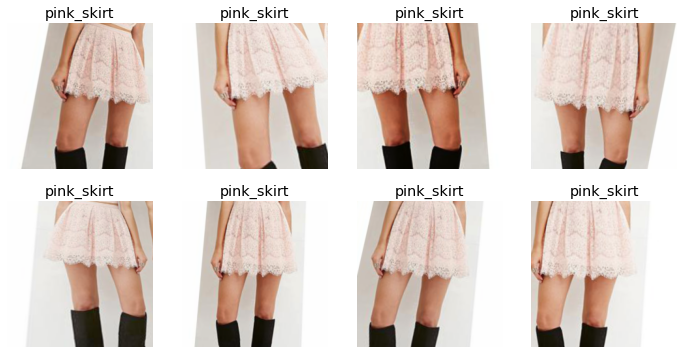

In [38]:
shirts = clothes.new(item_tfms=RandomResizedCrop(460, min_scale=0.5), batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = clothes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [40]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.246195,0.503679,0.160173,00:58


epoch,train_loss,valid_loss,error_rate,time
0,0.532041,0.270137,0.087817,01:12
1,0.368099,0.197953,0.063389,01:14
2,0.295787,0.177155,0.047619,01:15
3,0.242197,0.160722,0.042672,01:15
4,0.222545,0.170289,0.047928,01:16
5,0.180610,0.161278,0.047619,01:16
6,0.166300,0.159971,0.042981,01:16
7,0.157280,0.142383,0.038033,01:16
8,0.129263,0.162361,0.041435,01:16
9,0.119562,0.172084,0.044836,01:16
